In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
train = pd.read_csv("/content/pendigits-tra.csv")
test  = pd.read_csv("/content/pendigits-tes.csv")

In [ ]:
train.columns =['0', '1', '2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16']
test.columns  =['0', '1', '2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16']

In [ ]:
x_train = train.iloc[:, 0:16]
y_train = train.iloc[: ,16]

x_test = test.iloc[: ,0:16]
y_test = test.iloc[: ,16]

# **1**: **Apply decision tree**

Accuracy: 91.96454103517301


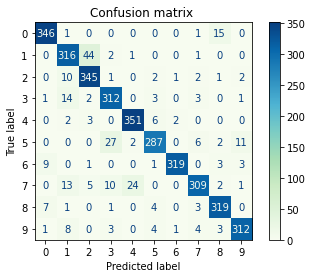

In [ ]:
classifier_1 = DecisionTreeClassifier()
classifier_1.fit(x_train, y_train)
y_pred_dt = classifier_1.predict(x_test)
print("Accuracy:", accuracy_score(y_pred_dt, y_test) * 100)
cm = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm).plot(cmap='GnBu')
plt.title("Confusion matrix ")
plt.show()

Accuracy: 37.2319130683443


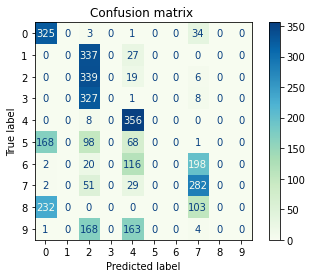

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
classifier.fit(x_train, y_train)
y_pred_dt = classifier.predict(x_test)
print("Accuracy:", accuracy_score(y_pred_dt, y_test) * 100)
cm = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm).plot(cmap='GnBu')
plt.title("Confusion matrix ")
plt.show()

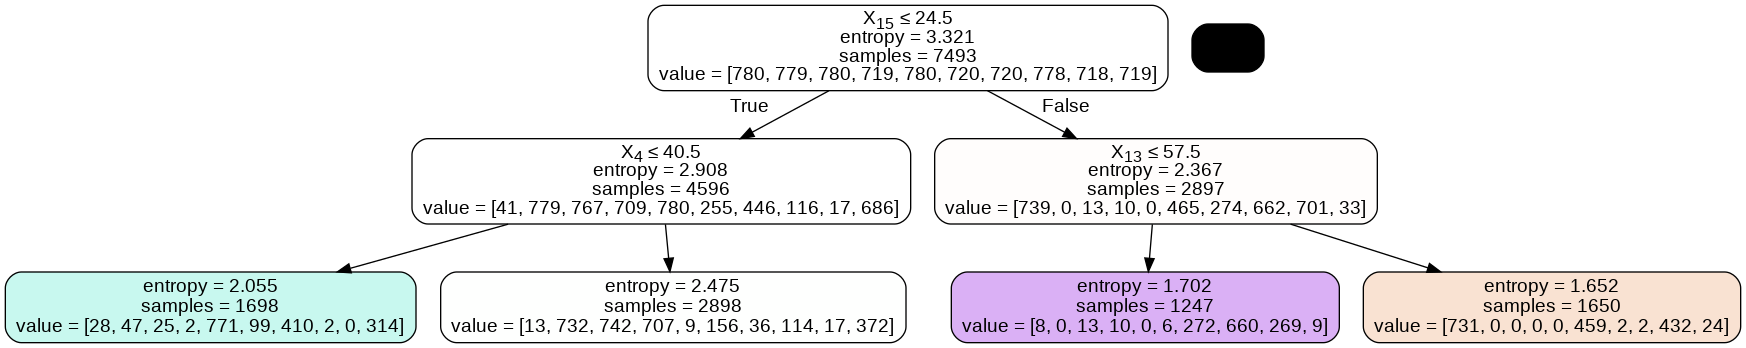

In [ ]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# **2**: **Bagging**

**a**: **Apply** **bagging** **strategy** **to** **classify** **test** **set**

Accuracy: 98.05547612239062
[[354   0   0   0   0   0   0   0   0   0]
 [  0 349   2   1   0   0   0  15   0   2]
 [  0  13 362   0   0   0   0   1   0   0]
 [  0   0   0 333   0   5   0   0   0   0]
 [  0   1   0   0 359   0   0   0   0   0]
 [  0   0   0   0   4 328   0   0   1   0]
 [  0   0   0   0   1   0 336   0   0   0]
 [  0   1   0   0   0   0   0 344   0   3]
 [  9   0   0   0   0   0   0   0 334   1]
 [  0   0   0   2   0   2   0   4   0 330]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       354
           1       0.96      0.95      0.95       369
           2       0.99      0.96      0.98       376
           3       0.99      0.99      0.99       338
           4       0.99      1.00      0.99       360
           5       0.98      0.98      0.98       333
           6       1.00      1.00      1.00       337
           7       0.95      0.99      0.97       348
           8       1.00      0.97      0.98       344


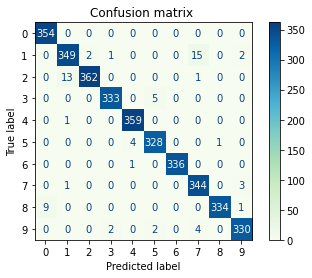

In [ ]:
# bagging strategy to classify test set samples by using SVM
clf_svm = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0).fit(x_train, y_train)
y_pred_svm=clf_svm.predict(x_test)

print("Accuracy:", accuracy_score(y_pred_svm, y_test) * 100)
print(metrics.confusion_matrix(y_pred_svm,y_test))
print(metrics.classification_report(y_pred_svm, y_test))

ConfusionMatrixDisplay(metrics.confusion_matrix(y_pred_svm,y_test)).plot(cmap='GnBu')
plt.title("Confusion matrix ")
plt.show()

Accuracy: 94.90992279096369
[[347   0   0   0   0   0   1   0   4   0]
 [  0 333   9   4   1   1   2  38   0   8]
 [  0  28 351   1   0   0   0   3   0   0]
 [  0   1   2 329   0   6   2   5   0   1]
 [  0   1   0   0 357   4   1   0   0   1]
 [  0   0   0   1   1 313   2   0   2   0]
 [  0   0   0   0   4   0 328   0   0   2]
 [  0   1   2   0   0   2   0 316   3   3]
 [ 16   0   0   0   0   3   0   2 326   2]
 [  0   0   0   1   1   6   0   0   0 319]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       352
           1       0.91      0.84      0.88       396
           2       0.96      0.92      0.94       383
           3       0.98      0.95      0.96       346
           4       0.98      0.98      0.98       364
           5       0.93      0.98      0.96       319
           6       0.98      0.98      0.98       334
           7       0.87      0.97      0.91       327
           8       0.97      0.93      0.95       349


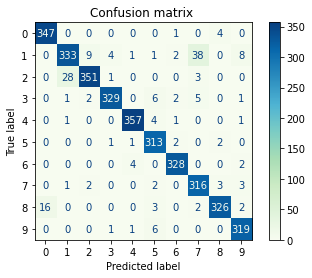

In [ ]:
# Train classification tree                
clf_TR = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0).fit(x_train, y_train)
y_pred_TR=clf_TR.predict(x_test)


print("Accuracy:", accuracy_score(y_pred_TR, y_test) * 100)
print(metrics.confusion_matrix(y_pred_TR,y_test))
print(metrics.classification_report(y_pred_TR, y_test))

ConfusionMatrixDisplay(metrics.confusion_matrix(y_pred_TR,y_test)).plot(cmap='GnBu')
plt.title("Confusion matrix ")
plt.show()

utilize majority voting (soft or hard) to get the final decision.


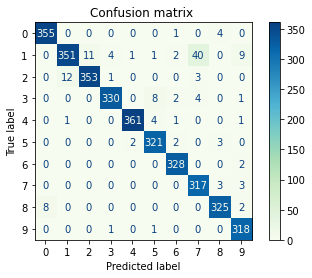

0.9605376036602803


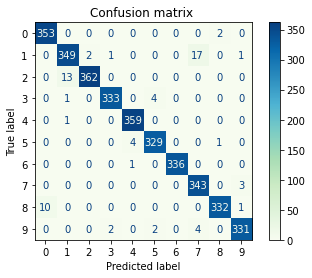

0.979982842436374


In [ ]:
from sklearn.ensemble import VotingClassifier

estimator = [('SVC',clf_svm) , ('DTC',clf_TR)]

# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard').fit(x_train, y_train)
y_pred_hard = vot_hard.predict(x_test)
acc_1=vot_hard.score(x_test, y_test)

ConfusionMatrixDisplay(metrics.confusion_matrix(y_pred_hard,y_test)).plot(cmap='GnBu')
plt.title("Confusion matrix ")
plt.show()
print(acc_1)  

# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft').fit(x_train, y_train)
y_pred_soft = vot_soft.predict(x_test)
acc_2=vot_soft.score(x_test, y_test)  

ConfusionMatrixDisplay(metrics.confusion_matrix(y_pred_soft,y_test)).plot(cmap='GnBu')
plt.title("Confusion matrix ")
plt.show()
print(acc_2)


**b**: **Find** **the** **best** **number** **of** **estimators** **as** **taking** **Decision** **Tree** **base** **estimator**

In [ ]:
n_estimators = [10,50,100,170,200]
l = []

for i in n_estimators:
  clf = BaggingClassifier(n_estimators=i, random_state=0).fit(x_train, y_train)
  y_pred=clf.predict(x_test)
  l.append(accuracy_score(y_pred, y_test))
l

[0.9490992279096369,
 0.9490992279096369,
 0.949671146697169,
 0.9513869030597655,
 0.9508149842722333]

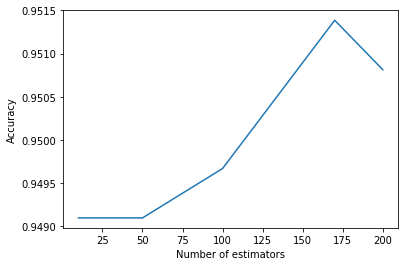

In [ ]:
n_estimators = [10,50,100,170,200]
accuracy = []
for i in n_estimators:
    clf = BaggingClassifier(n_estimators=i, random_state=0).fit(x_train, y_train)
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    accuracy.append(acc)

plt.plot(n_estimators, accuracy)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()

# **3**:  **Boosting**


**a**: **Use GradientBoosting classifier**

n_estimators=20, 60, 140, 200

In [ ]:
def gradient(n):
    clf = GradientBoostingClassifier(n_estimators=n, random_state=0).fit(x_train, y_train)
    acc=clf.score(x_test, y_test)
    y_pred=clf.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot(cmap='GnBu')
    plt.title("Confusion matrix ")
    plt.show()
    print(acc)

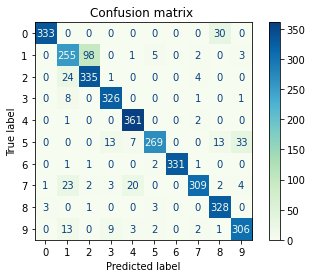

0.9016299685444666


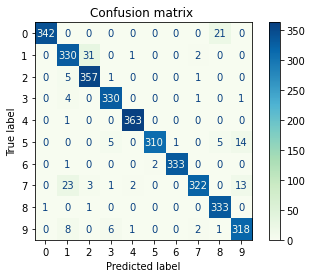

0.9545324563911924


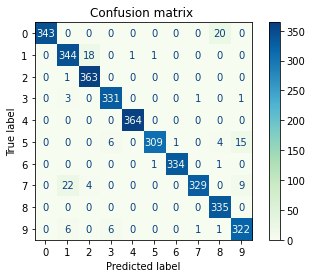

0.9648269945667716


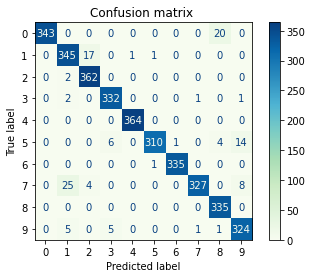

0.9656848727480698


In [ ]:
gradient(20)
gradient(60)
gradient(140)
gradient(200)

Highest accuracy: n_estomators= 200

learning rate = 0.1, 0.4, 0.7, 0.9

In [ ]:
def gradient_learn(n):
    clf = GradientBoostingClassifier(n_estimators=200, learning_rate=n, max_depth=1, random_state=0).fit(x_train, y_train)
    acc=clf.score(x_test, y_test)
    y_pred=clf.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot(cmap='GnBu')
    plt.title("Confusion matrix ")
    plt.show()
    print(acc)

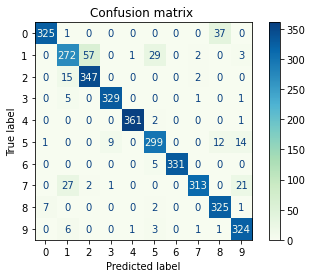

0.9225050042893909


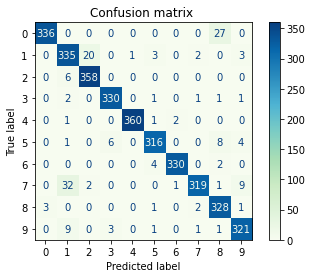

0.953102659422362


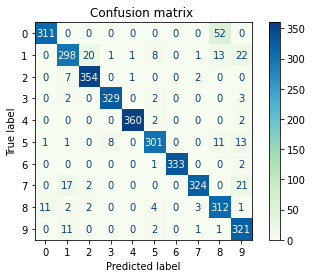

0.9273663139834144


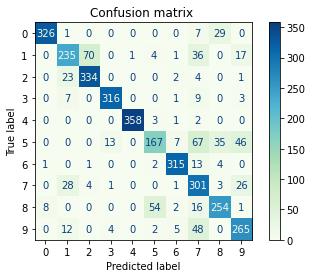

0.8209894195024307


In [ ]:
gradient_learn(0.1)
gradient_learn(0.5)
gradient_learn(0.7)
gradient_learn(0.9)

Best n_estimators=200 / learning_rate=0.5 


0.953102659422362


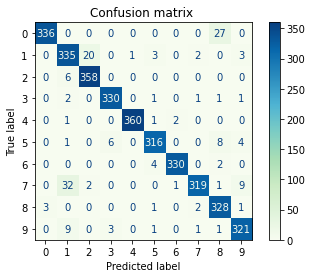

In [ ]:
clf_GD = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=1, random_state=0).fit(x_train, y_train)
acc=clf_GD.score(x_test, y_test)
y_pred=clf_GD.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(acc)
ConfusionMatrixDisplay(cm).plot(cmap='GnBu')
plt.title("Confusion matrix ")
plt.show()


**b**: **Build** **XGBoost** **classifier**

0.966256791535602


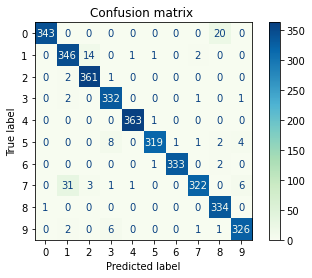

In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=200,learning_rate=0.5, random_state=42).fit(x_train, y_train)
acc=xgb_model.score(x_test, y_test)
y_pred = xgb_model.predict(x_test)
print(acc)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='GnBu')
plt.title("Confusion matrix ")
plt.show()
